<a href="https://colab.research.google.com/github/vkusnezh/Projects-Portfolio/blob/main/PB_test_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЗАВДАННЯ: побудувати модель бінарної класифікації на Python.

id - идентификатор объекта,
gb - target

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold



#   **1**. Зчитування файлу

In [ ]:
#завантаженя тестового файлу test(3).zip з даними з Google drive
url='https://drive.google.com/file/d/1wMn3p9znyIz-gmVCHJNfdUnkIzv2j8DA/view?usp=sharing'
url_c='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

data = pd.read_csv(url_c, sep='\t', index_col='id') #використовуючи бібліотеку Pandas зчитуємо .csv файл, дослідним шляхом виначивши, що sep='\t'

data.shape #превірка розмірності завантаженого датафрейму


(26824, 553)

# **2**. Exploratory Data Analysis



2.1.   **Досліджуємо завантажені дані**



In [ ]:
data.describe()

,Unnamed: 0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,cat_1,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_23,cat_2,num_24,cat_3,cat_4,num_25,num_26,num_27,cat_5,num_28,num_29,cat_6,cat_7,cat_8,num_30,cat_9,...,num_389,num_390,num_391,cat_125,num_392,num_393,cat_126,cat_127,cat_128,cat_129,num_394,num_395,num_396,num_397,cat_130,num_398,num_399,num_400,num_401,cat_131,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,cat_132,cat_133,num_414,num_415,num_416,cat_134,cat_135,gb
count,26824.000000,2.302800e+04,2.295300e+04,63.000000,26816.000000,1.720900e+04,2.682400e+04,26816.000000,26824.000000,26492.000000,16364.000000,21186.000000,36.000000,7816.000000,26816.000000,2.586000e+04,26816.000000,11530.000000,10350.00000,535.000000,2.682400e+04,445.000000,62.000000,1.0,0.0,26824.000000,1.0,26824.000000,26824.000000,799.000000,26816.000000,2.601100e+04,26824.000000,26824.000000,2.681600e+04,26824.000000,26824.000000,26824.000000,2.681600e+04,26824.000000,...,2.495900e+04,1158.000000,1158.000000,26824.000000,0.0,26813.000000,26824.000000,26824.000000,26824.000000,26824.000000,1661.000000,2.681400e+04,20819.000000,11.000000,26824.000000,18329.000000,216.000000,2.486500e+04,161.000000,26824.000000,2.649200e+04,156.000000,2.682400e+04,2.682400e+04,26824.000000,2.338600e+04,26824.000000,26824.000000,26824.000000,2.682400e+04,2.682400e+04,2.682400e+04,26824.000000,26824.000000,2.681600e+04,2.681600e+04,26816.000000,26824.000000,26824.000000,26824.000000
mean,29606.161013,4.969082e+03,6.187651e+03,10681.549206,1333.862619,1.811279e+03,3.542384e+03,44.456183,1.001789,130.260192,27.937470,242.786223,1377.333333,418.161899,291.643086,5.495242e+03,1.310300,265.482385,471.17218,-5846.926168,1.110516e+04,53.946067,32.532258,-8561.0,NaN,1.141403,221.0,1.362996,1.002386,561.941176,41.836627,-5.260944e+03,1.127200,925.885550,3.516451e+06,1.115978,1.000298,1.077393,5.271065e+04,2.035863,...,1.258487e+03,999.429188,33.341969,1.337571,NaN,0.550106,1.025574,1.000298,1.619296,1.001044,-267.546177,3.431250e+04,1481.240818,12890.454545,1.002050,1275.610126,1.648148,4.166503e+03,4452.245342,1.055174,2.007446e+05,7772.487179,1.796096e+04,1.775314e+04,387.615115,3.341067e+03,221.090359,387.615115,252.911456,2.389560e+04,1.110516e+04,5.696115e+03,1.011109,1.164480,5.938060e+06,3.697154e+02,0.070825,3.155942,1.011967,0.022107
std,17746.372502,5.684555e+04,7.633742e+04,38530.374205,753.316053,6.006882e+04,6.379273e+04,25.106561,0.074259,125.132054,412.358469,5503.738652,1501.049861,1906.033793,751.812548,7.265104e+04,2.048061,1601.555012,3877.87801,39684.141192,1.122779e+05,110.235014,36.321297,NaN,NaN,0.349298,NaN,0.481492,0.066844,2793.154282,36.815477,2.112461e+05,0.374005,17187.388064,7.744363e+06,0.352567,0.017267,0.268333,1.756721e+05,0.365000,...,3.835026e+04,552.071018,18.427709,0.473520,NaN,0.950787,0.225045,0.017267,0.509839,0.042290,23627.935069,6.583610e+04,11792.274069,12281.665696,0.051408,12591.995841,2.015359,6.173586e+04,9718.594627,0.252810,2.111213e+05,29177.029430,2.494841e+05,2.481340e+05,3149.091152,5.061099e+04,5351.820522,3149.091152,5364.756451,3.449906e+05,1.122779e+05,6.192586e+04,0.107624,0.370717,1.170207e+07,1.211155e+04,0.134555,1.626000,0.124109,0.147035
min,0.000000,1.000000e-01,1.000000e-01,12.000000,13.000000,1.000000e-01,-2.375040e+05,0.000000,1.000000,2.000000,0.100000,-0.300000,64.000000,-91.100000,0.000000,-7.000000e+00,0.000000,-214.700000,-1517.00000,-559612.000000,1.000000e-01,1.000000,1.000000,-8561.0,NaN,1.000000,221.0,1.000000,1.000000,50.000000,0.000000,-5.593766e+06,1.000000,-744283.960000,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,1.000000,...,-1.464723e+06,32.000000,1.000000,1.000000,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,-573804.000000,0.000000e+00,0.100000,1.000000,1.000000,0.100000,1.000000,1.000000e-01,16.500000,1.000000,0.000000e+00,30.000000,0.000000e+00,0.000000e+00,0.000000,-1.00000

In [ ]:
data.head(7) #візуальне одзнайомлення з 7ма першими рядками датафрейму

,Unnamed: 0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,cat_1,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_23,cat_2,num_24,cat_3,cat_4,num_25,num_26,num_27,cat_5,num_28,num_29,cat_6,cat_7,cat_8,num_30,cat_9,...,num_389,num_390,num_391,cat_125,num_392,num_393,cat_126,cat_127,cat_128,cat_129,num_394,num_395,num_396,num_397,cat_130,num_398,num_399,num_400,num_401,cat_131,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,cat_132,cat_133,num_414,num_415,num_416,cat_134,cat_135,gb
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1377.3,3712.9,NaN,1303.0,2409.0,1281.7,43.0,1,195.0,NaN,27.4,NaN,417.1,2210.0,12970.8,0.0,343.3,0.6,NaN,11327.5,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,60.0,-10446.6,1,559.6,18598389.68,1,1,1,74742.52,1,...,2784.3,NaN,NaN,1,NaN,0.0,1,1,1,1,NaN,4743.92,3758.2,NaN,1,9.4,NaN,7029.0,NaN,1,500000.0,NaN,11728.9,11728.3,1014.2,3454.0,0.0,1014.2,0.0,46913.2,11327.5,11327.5,1,1,28162496.65,0.0,0.07,1,1,0
2,1,20.0,13.4,NaN,565.0,NaN,357.2,19.0,1,170.0,NaN,NaN,NaN,NaN,68.0,123.6,2.0,NaN,NaN,NaN,168.6,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,12.0,-986.3,1,25.0,963054.61,1,1,1,0.00,2,...,143.4,NaN,NaN,1,NaN,2.0,1,1,1,1,NaN,6419.05,148.2,NaN,1,NaN,NaN,NaN,NaN,1,35000.0,NaN,1343.5,1343.5,0.0,NaN,0.0,0.0,0.0,1343.5,168.6,168.6,1,1,989383.82,0.0,0.56,2,1,0
3,4,150.6,1.8,NaN,2294.0,15.0,107.6,76.0,1,196.0,2.3,5.3,NaN,14.5,33.0,71.6,1.0,NaN,NaN,NaN,209.1,NaN,NaN,NaN,NaN,2,NaN,2,1,50.0,15.0,-161.3,1,99.8,71843.00,1,1,1,0.00,2,...,2.6,NaN,NaN,1,NaN,0.0,1,1,1,1,NaN,74.09,NaN,NaN,1,72.1,NaN,98.0,NaN,1,15000.0,NaN,268.9,268.9,13.5,10.2,79.6,13.5,79.6,268.9,209.1,209.1,1,1,87444.51,0.0,0.01,3,1,0
4,5,11.4,178.0,NaN,1236.0,NaN,350.6,41.0,1,117.0,5.3,25.2,NaN,NaN,39.0,57.6,2.0,NaN,1.3,NaN,56.9,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,41.0,-755.9,1,143.1,237787.00,1,1,1,12078.50,2,...,-171.9,NaN,NaN,1,NaN,0.0,1,1,1,1,NaN,5859.27,19.0,NaN,1,39.2,NaN,228.5,NaN,1,20000.0,NaN,1107.8,1106.5,0.0,24.9,0.0,0.0,0.0,1106.5,56.9,56.9,1,1,297608.00,0.0,0.08,4,1,0
5,6,5372.0,3386.0,NaN,1340.0,NaN,14.0,45.0,1,9.0,108.0,716.0,NaN,NaN,401.0,2447.0,0.0,1282.0,87.0,NaN,60925.0,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,64.0,1335.0,1,28.0,1665741.11,1,1,1,128520.23,2,...,196.0,NaN,NaN,2,NaN,5.0,1,1,1,1,6.0,3161.35,331.0,NaN,1,NaN,NaN,2649.0,NaN,2,190000.0,NaN,1436.0,1349.0,31.0,435.0,0.0,31.0,0.0,5396.0,60925.0,31.0,1,1,6614247.89,0.0,0.20,1,1,0
6,7,286.6,611.2,NaN,1289.0,NaN,558.2,43.0,1,195.0,4.0,21.9,NaN,NaN,1397.0,3230.1,1.0,45.0,NaN,NaN,3956.3,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,87.0,-1896.1,1,611.6,3137749.03,2,1,1,132596.65,2,...,3071.8,NaN,NaN,1,NaN,1.0,1,1,1,1,NaN,21.03,176.5,NaN,1,NaN,NaN,433.1,NaN,2,490000.0,NaN,2457.3,2454.3,0.0,3004.9,-3.0,0.0,0.0,9817.2,3956.3,3956.3,1,1,6952338.21,0.0,0.01,1,2,0
7,8,NaN,NaN,NaN,1534.0,81.2,178.7,51.0,1,190.0,NaN,14.1,NaN,NaN,165.0,81.5,1.0,0.2,NaN,NaN,120.3,NaN,NaN,NaN,NaN,1,NaN,2,1,NaN,12.0,-760.4,1,178.7,519045.75,1,1,1,6741.73,2,...,-34.9,NaN,NaN,2,NaN,0.0,1,1,2,1,NaN,1286.67,NaN,NaN,1,67.6,NaN,107.0,NaN,1,55000.0,NaN,939.1,939.1,0.0,0.8,136.4,0.0,136.4,939.1,120.3,120.3,1,1,657902.26,0.0,0.06,4,1,0


In [ ]:
data.isna().sum() #визначаємо к-сті відсутніх значень у стовпцях датафрейму

Unnamed: 0        0
num_1          3796
num_2          3871
num_3         26761
num_4             8
              ...  
num_415           8
num_416           8
cat_134           0
cat_135           0
gb                0
Length: 553, dtype: int64

In [ ]:
#data['gb'].dtype
data['gb'].sum()

593

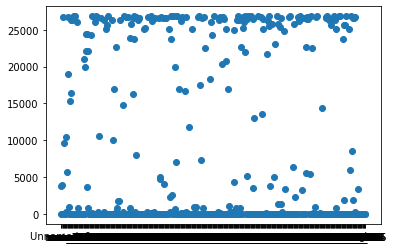

In [ ]:
plt.scatter(x=data.columns, y=data.isna().sum()) # візуальне представлення суми NaN по стовпцях

Наш датасет складається з стовпців числових і категоріальних змінних. Причому у стовпцях числових змінних є відсутніми багато значень. Як видно з поперднього запиту, у стовпці таргета - gb немає NaN значень, тому рядків видаляти не потрібно.

Подальші дії. Вибираємо спосіб заміни NaN значень:

2.1.   відсутні значення - замінимо на 0

2.2.   відсутні значення - замінюємо на середнє значення по стовцю за доп. SimpleImputer

Для перевірки ефективності вибраного способу видалимо категоріальні змінні, на даному етапі, та за допомогою простої моделі KNeighborsClassifier порівняємо точності для цих двох підходів.

Щодо категоріальних зміних, то існує три підходи як з ними працювати:

2.3. виключити їх з аналізу

2.4. використати Ordinal Encoding, приписує унікальне значення кожному integer

2.5. використати One-Hot Encoding, створюється новий стовпець - в якому вказується прустність (відсутність) кожного можливого значення у вихідному стовпці. Це призводить до збільшення к-сті стовців у робочому датафреймі(якщо категоріальна змінна має 6 категорій, тоді отримаємо 6 додаткових стовпців).







2.1.   **відсутні значення - замінимо на 0**

In [ ]:
data_m=data.fillna(0) #замінюємо значення NaN на 0, результат зберігаємо у новому датафреймі

In [ ]:
cols_with_missing = [col for col in data_m.columns if data_m[col].abs().sum()==0] #шукаємо імена стовпців у яких всі значення рівні 0
#print(cols_with_missing) 

#їх виявилось 12: ['num_23', 'num_66', 'num_150', 'num_152', 'num_242', 'num_250', 'num_258', 'num_266', 'num_342', 'num_365', 'num_375', 'num_392']

data_m.drop(cols_with_missing, axis=1, inplace=True) #вилучаємо пусті стовпці з датафрейму
data_m.describe()

,Unnamed: 0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,cat_1,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,cat_2,num_24,cat_3,cat_4,num_25,num_26,num_27,cat_5,num_28,num_29,cat_6,cat_7,cat_8,num_30,cat_9,cat_10,...,num_388,num_389,num_390,num_391,cat_125,num_393,cat_126,cat_127,cat_128,cat_129,num_394,num_395,num_396,num_397,cat_130,num_398,num_399,num_400,num_401,cat_131,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,cat_132,cat_133,num_414,num_415,num_416,cat_134,cat_135,gb
count,26824.000000,2.682400e+04,2.682400e+04,26824.000000,26824.000000,2.682400e+04,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,...,2.682400e+04,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000,26824.000000,2.682400e+04,26824.000000,26824.000000,2.682400e+04,26824.000000,2.682400e+04,2.682400e+04,26824.000000,2.682400e+04,26824.000000,26824.000000,26824.000000,2.682400e+04,2.682400e+04,2.682400e+04,26824.000000,26824.000000,2.682400e+04,2.682400e+04,26824.000000,26824.000000,26824.000000,26824.000000
mean,29606.161013,4.265882e+03,5.294704e+03,25.087146,1333.464808,1.162030e+03,3.542384e+03,44.442924,1.001789,128.647965,17.043273,191.756223,1.848494,121.844371,291.556106,5.297754e+03,1.309909,114.114670,181.801076,-116.615922,1.110516e+04,0.894945,0.075194,-0.319154,1.141403,0.008239,1.362996,1.002386,16.738406,41.824150,-5.101491e+03,1.127200,925.885550,3.515402e+06,1.115978,1.000298,1.077393,5.269493e+04,2.035863,1.001007,...,5.441312e+02,1.170988e+03,43.145653,1.439383,1.337571,0.549881,1.025574,1.000298,1.619296,1.001044,-16.567037,3.429970e+04,1149.640344,5.286124,1.002050,871.632046,0.013272,3.862217e+03,26.722767,1.055174,1.982600e+05,45.202356,1.796096e+04,1.775314e+04,387.615115,2.912846e+03,221.090359,387.615115,252.911456,2.389560e+04,1.110516e+04,5.696115e+03,1.011109,1.164480,5.936289e+06,3.696051e+02,0.070804,3.155942,1.011967,0.022107
std,17746.372502,5.269825e+04,7.064800e+04,1923.253451,753.555777,4.812064e+04,6.379273e+04,25.114551,0.074259,125.186429,322.359935,4892.233350,74.045219,1046.224823,751.717294,7.134091e+04,2.047881,1058.181008,2419.634538,5658.662398,1.122779e+05,15.767915,2.332558,52.271231,0.349298,1.349368,0.481492,0.066844,491.153381,36.817075,2.080220e+05,0.374005,17187.388064,7.743446e+06,0.352567,0.017267,0.268333,1.756482e+05,0.365000,0.040026,...,3.418578e+04,3.699438e+04,233.254561,7.782636,0.473520,0.950657,0.225045,0.017267,0.509839,0.042290,5878.307085,6.582716e+04,10407.084601,352.633246,0.051408,10425.648118,0.232926,5.944859e+04,825.633183,0.252810,2.109814e+05,2295.351956,2.494841e+05,2.481340e+05,3149.091152,4.726951e+04,5351.820522,3149.091152,5364.756451,3.449906e+05,1.122779e+05,6.192586e+04,0.107624,0.370717,1.170077e+07,1.210975e+04,0.134541,1.626000,0.124109,0.147035
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,-2.375040e+05,0.000000,1.000000,0.000000,0.000000,-0.300000,0.000000,-91.100000,0.000000,-7.000000e+00,0.000000,-214.700000,-1517.000000,-559612.000000,1.000000e-01,0.000000,0.000000,-8561.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-5.593766e+06,1.000000,-744283.960000,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,...,0.000000e+00,-1.464723e+06,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-573804.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.00

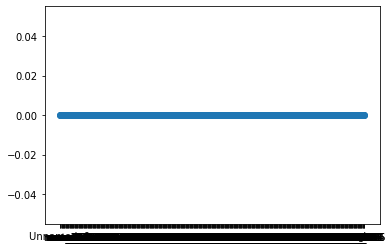

In [ ]:
plt.scatter(x=data_m.columns, y=data_m.isna().sum()) # візуальне представлення суми NaN по стовцях після їх заміни на 0, для перевірки

In [ ]:
#Відділяємо target від предикторів
y = data_m.gb
X = data_m.drop(['Unnamed: 0','gb'], axis=1)
X.shape

# розділяємо датасет на training і validation датасети
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

2.3. **Вилучаємо категоріальні змінні**

In [ ]:
print(X_train.dtypes) #перевірями тип категоріальних змінних 

num_1      float64
num_2      float64
num_3      float64
num_4      float64
num_5      float64
            ...   
num_414    float64
num_415    float64
num_416    float64
cat_134      int64
cat_135      int64
Length: 539, dtype: object


In [ ]:
# Складаємо список категоріальних змінних
s = (X_train.dtypes == 'int64')
cat_cols = list(s[s].index)

print("Categorical variables:")
print(cat_cols)

Categorical variables:
['cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7', 'cat_8', 'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14', 'cat_15', 'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 'cat_24', 'cat_25', 'cat_26', 'cat_27', 'cat_28', 'cat_29', 'cat_30', 'cat_31', 'cat_32', 'cat_33', 'cat_34', 'cat_35', 'cat_36', 'cat_37', 'cat_38', 'cat_39', 'cat_40', 'cat_41', 'cat_42', 'cat_43', 'cat_44', 'cat_45', 'cat_46', 'cat_47', 'cat_48', 'cat_49', 'cat_50', 'cat_51', 'cat_52', 'cat_53', 'cat_54', 'cat_55', 'cat_56', 'cat_57', 'cat_58', 'cat_59', 'cat_60', 'cat_61', 'cat_62', 'cat_63', 'cat_64', 'cat_65', 'cat_66', 'cat_67', 'cat_68', 'cat_69', 'cat_70', 'cat_71', 'cat_72', 'cat_73', 'cat_74', 'cat_75', 'cat_76', 'cat_77', 'cat_78', 'cat_79', 'cat_80', 'cat_81', 'cat_82', 'cat_83', 'cat_84', 'cat_85', 'cat_86', 'cat_87', 'cat_88', 'cat_89', 'cat_90', 'cat_91', 'cat_92', 'cat_93', 'cat_94', 'cat_95', 'cat_96', 'cat_97', 'cat_98', 'cat_

In [ ]:
drop_X_train = X_train.select_dtypes(exclude=['int64']) # вилучаємо ствовпці з типом змінних int64, у них записані категоріальні змінні, із робочих датафреймів  train і valid
drop_X_valid = X_valid.select_dtypes(exclude=['int64'])

In [ ]:
drop_X_train.head() # перевіряємо результат видалення категоріальних змінних

,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_24,num_25,num_26,num_27,num_28,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37,num_38,num_39,num_40,num_41,...,num_376,num_377,num_378,num_379,num_380,num_381,num_382,num_383,num_384,num_385,num_386,num_387,num_388,num_389,num_390,num_391,num_393,num_394,num_395,num_396,num_397,num_398,num_399,num_400,num_401,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,num_414,num_415,num_416
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1677,6.0,0.8,0.0,860.0,571.2,698.2,29.0,111.0,0.0,0.0,0.0,0.0,29.0,293.8,2.0,0.0,5.0,0.0,1660.0,0.0,0.0,0.0,0.0,0.0,29.0,-2865.2,101.800,8751.86,0.00,0.0,29858.77,71.800,0.0,0.0,0.0,0.0,-601.4,0.0,19.0,82914.14,...,0.0,0.0,71.8,1660.0,3563.400,71.800,566.9,0.0,363978.0,603710.0,0.0,15.0,0.0,74.8,0.0,0.0,0.0,0.0,65744.64,0.0,0.0,1.0,0.0,124.8,0.0,200000.0,0.0,3568.4,3563.4,0.0,269.2,30.0,0.0,30.0,3563.400,1660.0,1660.0,777898.00,0.00,0.03
5040,134.2,12.2,0.0,101.0,5060.7,7922.9,3.0,107.0,0.0,2173.0,0.0,0.0,169.0,0.0,1.0,0.0,0.0,0.0,10673.5,0.0,0.0,0.0,0.0,0.0,40.0,-12119.0,10235.414,12601006.56,0.00,0.7,842284.95,10236.212,0.0,0.0,0.0,0.0,-227.1,0.0,3.0,183262.86,...,0.0,0.0,7696.4,10673.5,26655.727,10236.345,3143.4,0.0,1813685.0,3846844.5,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,179748.12,3154.6,0.0,0.0,0.0,0.0,0.0,200000.0,0.0,20042.6,20041.9,0.0,0.0,-0.7,0.0,0.0,26655.727,10673.5,10673.5,29237130.66,0.00,0.02
1217,38.3,51.2,0.0,1086.0,0.0,392.5,36.0,6.0,1.9,13.5,0.0,69.2,58.0,471.3,1.0,0.0,0.0,0.0,850.1,0.0,0.0,0.0,0.0,0.0,50.0,-1656.4,21.800,646575.69,0.00,0.0,599887.10,20.200,0.0,0.0,0.0,0.0,-370.7,0.0,16.0,194354.45,...,0.0,0.0,20.2,850.1,2048.900,20.200,650.3,0.0,49421.0,296307.0,0.0,6.0,0.0,16.9,0.0,0.0,0.0,0.0,13175.31,43.3,0.0,304.9,0.0,508.0,0.0,180000.0,0.0,2048.9,2048.9,73.4,460.0,1.6,73.4,1.6,2048.900,850.1,850.1,1133025.69,0.00,0.00
927,3953.3,1367.6,0.0,581.0,1826.2,1825.1,19.0,229.0,14.8,50.7,0.0,0.0,53.0,5037.7,1.0,710.1,428.2,0.0,12319.6,0.0,0.0,0.0,0.0,0.0,130.0,-6346.8,800.000,4856118.21,45611.69,0.0,4126803.61,592.400,0.0,0.0,0.0,0.0,-1853.3,0.0,8.0,489166.45,...,0.0,0.0,296.2,12319.6,16343.800,592.400,5382.8,0.0,583197.0,3053699.5,0.0,8.0,0.0,2611.0,0.0,0.0,0.0,0.0,2640.89,237.4,0.0,3779.2,0.0,5748.5,0.0,330000.0,0.0,8600.1,8171.9,1135.8,1417.2,103.8,1135.8,103.8,16343.800,12319.6,12319.6,5876746.46,1195.42,0.00
2182,242.1,17.2,0.0,1344.0,8.0,87.3,45.0,71.0,1.6,3.2,0.0,0.0,25.0,280.9,2.0,1.4,0.0,0.0,513.4,0.0,0.0,0.0,0.0,0.0,16.0,-2413.2,80.700,377026.18,17085.21,0.0,54884.29,75.600,0.0,0.0,0.0,0.0,-6.6,0.0,29.0,61293.39,...,0.0,0.0,75.6,513.4,2500.500,75.600,210.5,0.0,2701.0,99024.5,0.0,10.0,0.0,85.6,0.0,0.0,0.0,0.0,5140.84,50.6,0.0,20.3,0.0,294.9,0.0,70000.0,0.0,2500.5,2500.5,186.4,87.6,5.1,186.4,5.1,2500.500,513.4,513.4,433442.18,0.00,0.02


In [ ]:
#Виконуємо масштабування ознак (Feature Scaling), оскільки у датасеті є багато стовпців з досить великими різницями у діапазонах значень

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#scaler.fit(drop_X_train)

#drop_X_train = scaler.transform(drop_X_train)
#drop_X_valid = scaler.transform(drop_X_valid)

# **3**. Моделювання і оцінка

Для оцінки підходів до NaN значень використаємо K-Nearest Neighbors Algorithm. Він є достатньо простим та швидким алгоритмом. Він погано працює з категоріальними змінними і великими датасетами, тому для фінального моделювання його не будемо використовувати. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(drop_X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(drop_X_valid)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[5225   29]
 [  62   49]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5254
           1       0.63      0.44      0.52       111

    accuracy                           0.98      5365
   macro avg       0.81      0.72      0.75      5365
weighted avg       0.98      0.98      0.98      5365



In [ ]:
def score_dataset_KNN(X_train, X_valid, y_train, y_valid): #створюємо функцію для оцінювання точності різних підходів обробки датасету
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_valid)
    return classification_report(y_valid, y_pred)

In [ ]:
print("KNeighborsClassifier classification_report для першого підходу (відсутні значення - замінені на 0, категоріальні змінні - видалені):")
print(score_dataset_KNN(drop_X_train, drop_X_valid, y_train, y_valid))

KNeighborsClassifier classification_report для першого підходу (відсутні значення - замінені на 0, категоріальні змінні - видалені):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5254
           1       0.63      0.44      0.52       111

    accuracy                           0.98      5365
   macro avg       0.81      0.72      0.75      5365
weighted avg       0.98      0.98      0.98      5365



In [ ]:
error = []

# Обчислюємо похибку для значень K в діапазоні від 1 до 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(drop_X_train, y_train)
    pred_i = knn.predict(drop_X_valid)
    error.append(np.mean(pred_i != y_valid))

Text(0, 0.5, 'Mean Error')

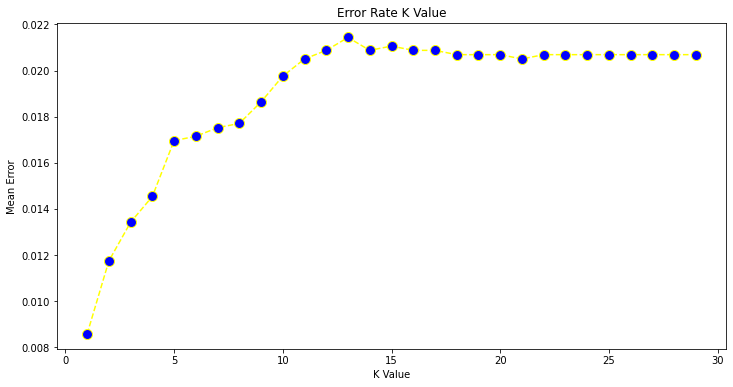

In [ ]:
plt.figure(figsize=(12, 6)) # будуємо графік залежності середньої похибки від параметра К моделі KNeighborsClassifier
plt.plot(range(1, 30), error, color='yellow', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Застосуємо до даних Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(drop_X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(drop_X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[5219   35]
 [  49   62]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5254
           1       0.64      0.56      0.60       111

    accuracy                           0.98      5365
   macro avg       0.81      0.78      0.79      5365
weighted avg       0.98      0.98      0.98      5365



In [ ]:
def score_dataset_DTC(X_train, X_valid, y_train, y_valid): #створюємо функцію для оцінювання точності DecisionTreeClassifier для різних підходів обробки датасету
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_valid)
    return classification_report(y_valid, y_pred)

In [ ]:
print("DecisionTreeClassifier classification_report для першого підходу (відсутні значення - замінені на 0, категоріальні змінні - видалені):")
print(score_dataset_DTC(drop_X_train, drop_X_valid, y_train, y_valid))

DecisionTreeClassifier classification_report для першого підходу (відсутні значення - замінені на 0, категоріальні змінні - видалені):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5254
           1       0.60      0.53      0.56       111

    accuracy                           0.98      5365
   macro avg       0.79      0.76      0.78      5365
weighted avg       0.98      0.98      0.98      5365



Проміжні результати:
для обох скласифікаторів KNeighborsClassifier і DecisionTreeClassifier бачимо точність класифікації для "0" рівною 0,99, тоді як для "1" - 0,63 і 0,61, відповідно. 

Наступний крок: 

відсутні значення - замінюємо на середнє значення по стовцю за доп. SimpleImputer, і тоді ще раз застосуємо класифікатори.

2.2.   **відсутні значення - замінюємо на середнє значення по стовцю** за доп. SimpleImputer

In [ ]:
#Відділяємо target від предикторів
y1 = data.gb
X1 = data.drop(['Unnamed: 0','gb'], axis=1)
X1.drop(cols_with_missing, axis=1, inplace=True)

drop_X1 = X1.select_dtypes(exclude=['int64']) # вилучаємо ствовпці з типом змінних int64, у них записані категоріальні змінні, із робочих датафреймів  train і valid
X1.shape

(26824, 539)

In [ ]:
# розділяємо датасет на training і validation датасети
X1_train, X1_valid, y1_train, y1_valid = train_test_split(drop_X1, y1, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [ ]:
# Imputation, замінюємо відсутні дані середнім арифметичним значенням для кожної колонки
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X1_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X1_valid))

# Imputation видалає імена стовпців; повертаємо їх
imputed_X_train.columns = X1_train.columns
imputed_X_valid.columns = X1_valid.columns

In [ ]:
imputed_X_valid.head()

,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_24,num_25,num_26,num_27,num_28,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37,num_38,num_39,num_40,num_41,...,num_376,num_377,num_378,num_379,num_380,num_381,num_382,num_383,num_384,num_385,num_386,num_387,num_388,num_389,num_390,num_391,num_393,num_394,num_395,num_396,num_397,num_398,num_399,num_400,num_401,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,num_414,num_415,num_416
0,4722.092063,5877.500015,12722.844231,538.0,1454.905212,117.8,18.0,257.0,0.400000,18.400000,1457.821429,414.048696,8.0,221.5,1.0,257.411075,451.375399,-6906.429812,346.6,56.545946,33.12963,-8561.0,221.0,548.757342,14.0,-274.8,117.400,1255142.37,2669.54,350.588332,108344.43,117.400,1.659567,1511.309128,9711.656978,1293.377934,-0.400000,9471.456462,24.0,15000.00,...,-6413.10359,4906.822263,117.4,346.6,392.600,117.400,251.9,10.0,0.0,126509.0,-1644.4,3.0,3.000000,200.4,991.153523,33.064143,0.0,-808.10367,27127.03,83.100000,15720.333333,1252.681018,1.674419,21.1,3808.785156,15000.0,5606.714286,392.6,392.6,0.0,68.8,0.0,0.0,0.0,392.600,346.6,346.6,1255322.66,197.38,0.23
1,6.000000,1.000000,12722.844231,1557.0,1454.905212,225.0,52.0,83.0,28.255943,6.000000,1457.821429,414.048696,12.0,142.0,2.0,257.411075,451.375399,-6906.429812,126.0,56.545946,33.12963,-8561.0,221.0,548.757342,11.0,-465.0,225.000,0.00,0.00,350.588332,159706.63,9.000,1.659567,1511.309128,9711.656978,1293.377934,-1330.596298,9471.456462,14.0,34126.61,...,-6413.10359,4906.822263,9.0,126.0,690.000,9.000,-1067.0,10.0,419750.0,43800.0,-1644.4,4.0,4770.444029,-617.0,991.153523,33.064143,0.0,-808.10367,2396.74,1422.916711,15720.333333,1252.681018,1.674419,719.0,3808.785156,35000.0,5606.714286,690.0,690.0,0.0,134.0,216.0,0.0,216.0,690.000,126.0,126.0,24863.00,3273.24,0.00
2,158.100000,1261.300000,12722.844231,685.0,516.600000,3385.8,23.0,9.0,28.255943,74.300000,1457.821429,414.048696,288.0,8930.7,2.0,939.500000,37.200000,-6906.429812,6201.3,56.545946,33.12963,-8561.0,221.0,548.757342,32.0,-8825.2,2593.600,1914518.99,181481.91,350.588332,1853857.74,2593.600,1.659567,1511.309128,3.800000,1293.377934,-829.400000,3.800000,6.0,294998.75,...,-6413.10359,4906.822263,2593.6,6201.3,12211.000,2593.600,5270.4,10.0,250682.0,2205768.0,-1644.4,9.0,4770.444029,2610.0,991.153523,33.064143,0.0,-808.10367,4293.00,817.200000,15720.333333,5761.200000,1.674419,6585.6,3808.785156,200000.0,5606.714286,12248.2,12211.0,148.9,5988.6,0.0,148.9,0.0,12211.000,6201.3,6201.3,3891837.97,1541.02,0.03
3,1071.700000,345.900000,12722.844231,1455.0,1454.905212,4704.3,48.0,469.0,28.255943,223.209396,1457.821429,414.048696,1149.0,11234.8,0.0,257.411075,451.375399,-6906.429812,10859.3,56.545946,33.12963,-8561.0,221.0,548.757342,133.0,-33712.0,248.577,1121405.66,73640.58,350.588332,4374766.63,248.577,2.000000,1511.309128,9711.656978,1293.377934,-4517.400000,9471.456462,23.0,500000.00,...,-6413.10359,4906.822263,186.9,10859.3,51093.679,248.577,2745.2,10.0,2529231.0,3572474.0,-1644.4,14.0,2.600000,109.0,991.153523,33.064143,2.0,-808.10367,51071.16,1311.300000,15720.333333,714.400000,1.674419,11239.6,3808.785156,500000.0,5606.714286,38416.3,38416.3,1625.2,7789.3,0.0,1625.2,0.0,51093.679,10859.3,10859.3,23352525.11,0.00,0.00
4,80.200000,1389.300000,12722.844231,1011.0,1454.905212,1451.0,34.0,346.0,3.300000,35.500000,1457.821429,414.048696,680.0,2833.9,4.0,257.411075,451.375399,-6906.429812,3308.2,56.545946,33.12963,-8561.0,221.0,548.757342,60.0,-7874.1,-43.358,6236197.94,16610.00,350.588332,116554.20,-64.904,1.659567,1511.309128,330.000000,1293.377934,-1483.600000,330.000000,12.0,235324.85,...,-6413.10359,4906.822263,-48.8,3308.2,12402.383,-64.904,2293.9,10.0,321200.0,1178220.0,-1644.4,5.0,4770.444029,1722.0,991.153523,33.064143,1.0,-808.10367,39827.45,486.700000,15720.333333,48.100000,1.674419,598.0,3808.785156,200000.0,5606.714286,93

In [ ]:
print("KNeighborsClassifier classification_report для першого підходу (відсутні значення - замінені на середнє по колонці, категоріальні змінні - видалені):")
print(score_dataset_KNN(imputed_X_train, imputed_X_valid, y_train, y_valid))

KNeighborsClassifier classification_report для першого підходу (відсутні значення - замінені на середнє по колонці, категоріальні змінні - видалені):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5254
           1       0.63      0.44      0.52       111

    accuracy                           0.98      5365
   macro avg       0.81      0.72      0.75      5365
weighted avg       0.98      0.98      0.98      5365



In [ ]:
print("DecisionTreeClassifier classification_report для першого підходу (відсутні значення - замінені на середнє по колонці, категоріальні змінні - видалені):")
print(score_dataset_DTC(imputed_X_train, imputed_X_valid, y_train, y_valid))

DecisionTreeClassifier classification_report для першого підходу (відсутні значення - замінені на середнє по колонці, категоріальні змінні - видалені):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5254
           1       0.54      0.62      0.58       111

    accuracy                           0.98      5365
   macro avg       0.77      0.81      0.79      5365
weighted avg       0.98      0.98      0.98      5365



Точність класифікації для моделей DecisionTreeClassifier і KNeighborsClassifier - залишилась практично без змін.

Проміжний висновок:

для подальшого аналізу використаємо простіший підхід - заміна NaN значень на 0

2.4. **Для категоріальних змінних застосовуємо Ordinal Encoding**, що приписує унікальне значення кожному integer

В нашому датасеті ця дія вже виконана! 
Тому беремо початковий датасет, замінюємо NaN на 0, та залишаємо стовпці з категоріальними змінними.

In [ ]:
X2=X1.fillna(0)
y2=y1
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, train_size=0.7, test_size=0.3,
                                                                random_state=0)

In [ ]:
X2_train.describe()

,num_1,num_2,num_3,num_4,num_5,num_6,num_7,cat_1,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,cat_2,num_24,cat_3,cat_4,num_25,num_26,num_27,cat_5,num_28,num_29,cat_6,cat_7,cat_8,num_30,cat_9,cat_10,num_31,...,cat_124,num_388,num_389,num_390,num_391,cat_125,num_393,cat_126,cat_127,cat_128,cat_129,num_394,num_395,num_396,num_397,cat_130,num_398,num_399,num_400,num_401,cat_131,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,cat_132,cat_133,num_414,num_415,num_416,cat_134,cat_135
count,1.877600e+04,1.877600e+04,18776.000000,18776.000000,1.877600e+04,1.877600e+04,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,1.877600e+04,18776.000000,18776.000000,18776.000000,18776.000000,1.877600e+04,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,1.877600e+04,18776.000000,18776.000000,1.877600e+04,18776.000000,18776.000000,18776.000000,1.877600e+04,18776.000000,18776.000000,18776.000000,...,18776.000000,1.877600e+04,1.877600e+04,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,1.877600e+04,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,1.877600e+04,18776.000000,18776.000000,1.877600e+04,18776.000000,1.877600e+04,1.877600e+04,18776.000000,1.877600e+04,18776.000000,18776.000000,18776.000000,1.877600e+04,1.877600e+04,1.877600e+04,18776.000000,18776.000000,1.877600e+04,1.877600e+04,18776.000000,18776.000000,18776.000000
mean,4.114530e+03,5.142687e+03,35.036808,1335.397049,9.708876e+02,3.289001e+03,44.506657,1.002077,129.083032,16.912009,165.296445,1.918140,119.399063,290.997550,5.227165e+03,1.305816,110.701555,180.820937,-146.212292,1.062085e+04,0.977524,0.089636,-0.455954,1.141564,0.011770,1.362164,1.002450,17.241745,41.856998,-6.266644e+03,1.127929,897.413706,3.516821e+06,1.117703,1.000320,1.077226,5.287979e+04,2.034193,1.000959,82.228478,...,1.396890,6.134803e+02,1.043989e+03,43.986738,1.467405,1.335908,0.548626,1.026150,1.000320,1.616958,1.001172,-54.641111,3.410685e+04,1076.484863,7.535311,1.002290,817.994051,0.012836,3.964222e+03,21.877024,1.053845,1.986376e+05,30.788400,1.876277e+04,1.855340e+04,353.724390,3.000623e+03,252.564274,353.724390,286.568241,2.496599e+04,1.062085e+04,5.451407e+03,1.011025,1.165371,5.945724e+06,3.950459e+02,0.071779,3.154346,1.012143
std,5.099232e+04,6.884520e+04,2298.145267,754.556744,4.064212e+04,5.130762e+04,25.147464,0.080913,125.362920,328.861072,4032.345623,81.937578,1056.829262,753.929864,6.865000e+04,1.944393,951.106974,2313.922481,6673.753233,9.793712e+04,17.429923,2.552460,62.477402,0.349527,1.612838,0.481303,0.067635,501.676545,36.991254,2.168360e+05,0.372469,17581.339456,7.787924e+06,0.353629,0.017874,0.268152,1.775625e+05,0.365055,0.039962,1780.609556,...,3.120811,3.654463e+04,3.444187e+04,234.844688,7.837035,0.472995,0.948630,0.227785,0.017874,0.509989,0.044973,6857.631811,6.444488e+04,6691.303308,421.463577,0.054076,6997.721275,0.225168,6.448417e+04,611.455225,0.249907,2.116226e+05,1339.215861,2.563170e+05,2.551219e+05,2388.780695,4.883122e+04,6008.342607,2388.780695,6021.589845,3.537081e+05,9.793712e+04,5.140842e+04,0.107438,0.371525,1.176959e+07,1.402893e+04,0.136972,1.622260,0.124973
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,-2.375040e+05,0.000000,1.000000,0.000000,0.000000,-0.300000,0.000000,-91.100000,0.000000,-7.000000e+00,0.000000,-214.700000,-1517.000000,-559612.000000,1.000000e-01,0.000000,0.000000,-8561.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,-5.593766e+06,1.000000,-744283.960000,0.000000e+00,1.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,-0.100000,...,1.000000,0.000000e+00,-1.464723e+06,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-573804.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder

# робимо копії, щоб уникнути зміни оригінальних даних  
#label_X2_train = X2_train.copy()
#label_X2_valid = X2_valid.copy()

# Apply ordinal encoder to each column with categorical data
#ordinal_encoder = OrdinalEncoder()
#label_X2_train[cat_cols] = ordinal_encoder.fit_transform(X2_train[cat_cols])
#label_X2_valid[cat_cols] = ordinal_encoder.transform(X2_valid[cat_cols])

print("KNeighborsClassifier classification_report для 3го підходу (відсутні значення - замінені на о, категоріальні змінні - цілі числа):")
print(score_dataset_KNN(X2_train, X2_valid, y2_train, y2_valid))

KNeighborsClassifier classification_report для 3го підходу (відсутні значення - замінені на о, категоріальні змінні - цілі числа):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7867
           1       0.68      0.39      0.50       181

    accuracy                           0.98      8048
   macro avg       0.83      0.69      0.74      8048
weighted avg       0.98      0.98      0.98      8048



In [ ]:
print("DecisionTreeClassifier classification_report для для 3го підходу (відсутні значення - замінені на 0, категоріальні змінні - цілі числа):")
print(score_dataset_DTC(X2_train, X2_valid, y2_train, y2_valid))

DecisionTreeClassifier classification_report для для 3го підходу (відсутні значення - замінені на 0, категоріальні змінні - цілі числа):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7867
           1       0.58      0.59      0.59       181

    accuracy                           0.98      8048
   macro avg       0.79      0.79      0.79      8048
weighted avg       0.98      0.98      0.98      8048



Проміжний висновок:
Точність класифікації для моделі KNeighborsClassifier - незначно зросла, тоді як для DecisionTreeClassifier - залишилась практично без змін.

На даному етапі для підготованого датасету можна спробувати застосувати складнішу модель класифікації - RandomForestRegressor.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error #середня абсолютна похибка

# function for comparing different approaches
def score_dataset_RFR(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=50, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

In [ ]:
print("RandomForestRegressor classification_report для для 3го підходу (відсутні значення - замінені на 0, категоріальні змінні - цілі числа):")
print(score_dataset_RFR(X2_train, X2_valid, y2_train, y2_valid))

RandomForestRegressor classification_report для для 3го підходу (відсутні значення - замінені на 0, категоріальні змінні - цілі числа):
0.011928429423459244


In [ ]:
def score_dataset_KNN_MAE(X_train, X_valid, y_train, y_valid): #створюємо функцію для визначення середньої абсолютної похибки - MAE при використанні KNN моделі 
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

In [ ]:
print("KNeighborsClassifier classification_report для 3го підходу (відсутні значення - замінені на о, категоріальні змінні - цілі числа):")
print(score_dataset_KNN_MAE(X2_train, X2_valid, y2_train, y2_valid))

KNeighborsClassifier classification_report для 3го підходу (відсутні значення - замінені на о, категоріальні змінні - цілі числа):
0.017892644135188866


In [ ]:
def score_dataset_DTC_MAE(X_train, X_valid, y_train, y_valid): #створюємо функцію для визначення середньої абсолютної похибки - MAE при використанні DTC моделі 
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

In [ ]:
print("DecisionTreeClassifier classification_report для для 3го підходу (відсутні значення - замінені на 0, категоріальні змінні - цілі числа):")
print(score_dataset_DTC_MAE(X2_train, X2_valid, y2_train, y2_valid))

DecisionTreeClassifier classification_report для для 3го підходу (відсутні значення - замінені на 0, категоріальні змінні - цілі числа):
0.020874751491053677


In [ ]:
MAE_err = []

MAE_err.append(['RandomForestClassifier', '1.2'])
MAE_err.append(['KNeighborsClassifier', '1.8'])
MAE_err.append(['DecisionTreeClassifier', '2.1'])

MAE_err = pd.DataFrame(MAE_err, columns=['Класифікатор', 'МАЕ, %'])

print(MAE_err)

             Класифікатор МАЕ, %
0  RandomForestClassifier    1.2
1    KNeighborsClassifier    1.8
2  DecisionTreeClassifier    2.1


Як видно з торівняльної таблиці, найменшу похибку дає застосування RandomForestClassifier.



**Висновок**
У початковому датасеті замінюємо NaN на 0, та залишаємо стовпці з категоріальними змінними.

**XGBClassifier**

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
print(xgbc)

xgbc.fit(X2_train, y2_train)

# - cross validataion
scores = cross_val_score(xgbc, X2_train, y2_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X2_train, y2_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbc.predict(X2_valid)
cm = confusion_matrix(y2_valid,ypred)
print(cm)

XGBClassifier()
Mean cross-validation score: 0.98
K-fold CV average score: 0.98
[[7865    2]
 [ 144   37]]


In [ ]:
RFC = RandomForestClassifier(n_estimators=50, random_state=0)
RFC.fit(X2_train, y2_train)

# - cross validataion
scores = cross_val_score(RFC, X2_train, y2_train, cv=5)
print("Mean cross-validation score RFC: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(RFC, X2_train, y2_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = RFC.predict(X2_valid)
cm = confusion_matrix(y2_valid,ypred)
print(cm)

Mean cross-validation score RFC: 0.99
K-fold CV average score: 0.99
[[7866    1]
 [  95   86]]
